In [1]:
# ========== INSTALLATION ==========
!pip install diffusers transformers accelerate pillow torch torchvision --index-url https://download.pytorch.org/whl/cu118 -q
!pip install gradio opencv-python numpy requests zipfile36 -q

In [2]:
import torch
import gradio as gr
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np
import cv2
import random
import zipfile
import os
import json
from datetime import datetime
from io import BytesIO
import requests
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

🎯 TEST YOUR BRAND - Model is already loaded!
--------------------------------------------------
📤 STEP 1: Upload your brand images
------------------------------
📁 Upload your BRAND LOGO (PNG/JPG recommended):


Saving 002-nike-logos-swoosh-white.jpg to 002-nike-logos-swoosh-white (1).jpg
✅ Logo uploaded: 002-nike-logos-swoosh-white (1).jpg ((5000, 2813))

📁 Upload your PRODUCT IMAGE (PNG/JPG):


Saving WMNS+AIR+JORDAN+1+LOW.avif to WMNS+AIR+JORDAN+1+LOW (1).avif
✅ Product uploaded: WMNS+AIR+JORDAN+1+LOW (1).avif ((1872, 2340))

👁️ Your uploaded images:


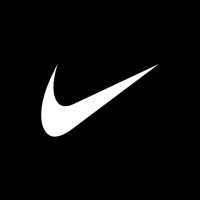

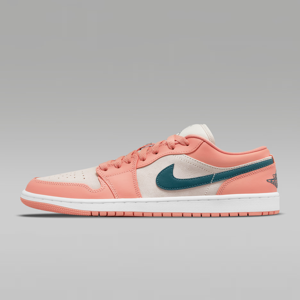


🏷️ STEP 2: Enter brand information
------------------------------
Enter your brand name: Nike
Enter product description: Nice comfy shoes

🎯 Generating ads for: Nike - Nice comfy shoes

🎨 STEP 3: Using AI model to generate backgrounds
------------------------------
Generating unique backgrounds for your ads...
⚠️ Model not found, loading small version...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
`torch_dtype` is deprecated! Use `dtype` instead!
The config attributes {'pred

  Generating Modern background...


  0%|          | 0/20 [00:00<?, ?it/s]

    ✅ AI-generated
  Generating Vibrant background...


  0%|          | 0/20 [00:00<?, ?it/s]

    ✅ AI-generated
  Generating Luxury background...


  0%|          | 0/20 [00:00<?, ?it/s]

    ✅ AI-generated
  Generating Tech background...


  0%|          | 0/20 [00:00<?, ?it/s]

    ✅ AI-generated
  Generating Nature background...


  0%|          | 0/20 [00:00<?, ?it/s]

    ✅ AI-generated

👁️ Generated backgrounds:


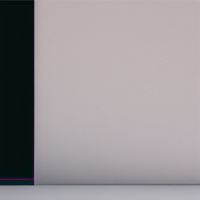

  Modern


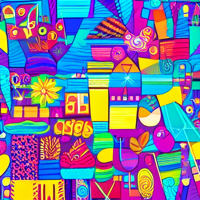

  Vibrant


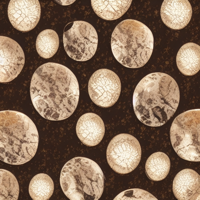

  Luxury


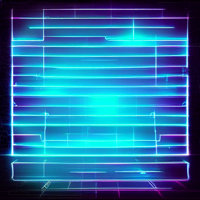

  Tech


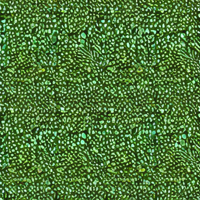

  Nature

✨ STEP 4: Creating ad variations with your images
------------------------------
Creating 5 professional ad variations...
  Creating Modern variation...


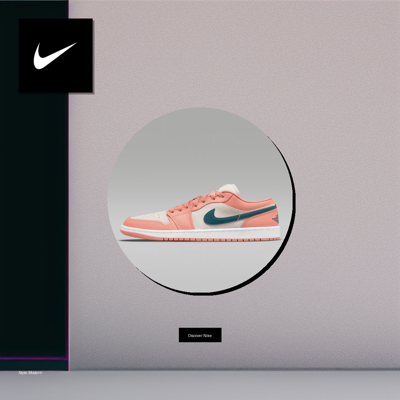

    ✅ Modern ad created
  Creating Vibrant variation...


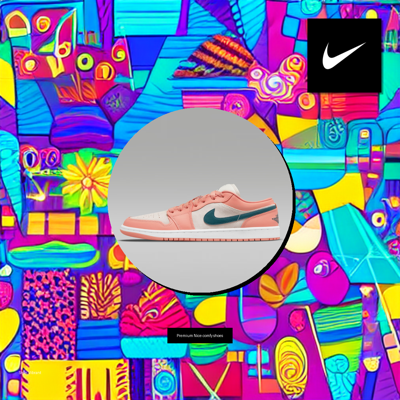

    ✅ Vibrant ad created
  Creating Luxury variation...


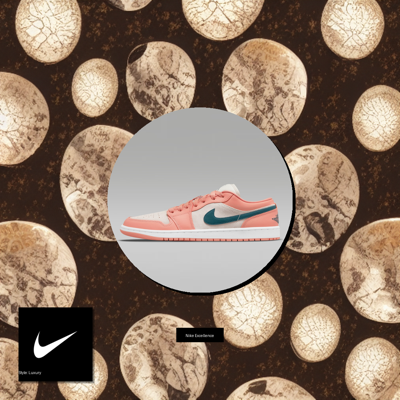

    ✅ Luxury ad created
  Creating Tech variation...


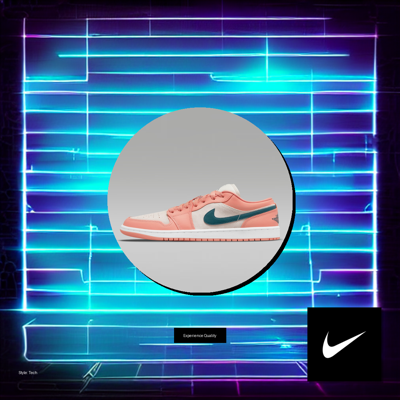

    ✅ Tech ad created
  Creating Nature variation...


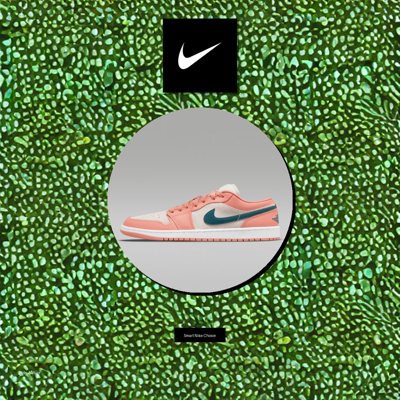

    ✅ Nature ad created

✅ Generated 5 ad variations!

📦 STEP 5: Creating download package
------------------------------
Creating ZIP: /tmp/Nike_AdCreatives_20251203_081227.zip
  Added: Nike_Modern_ad.jpg
  Added: Nike_Vibrant_ad.jpg
  Added: Nike_Luxury_ad.jpg
  Added: Nike_Tech_ad.jpg
  Added: Nike_Nature_ad.jpg

✅ Package created successfully!
📁 File: /tmp/Nike_AdCreatives_20251203_081227.zip
📊 Size: 1.76 MB
📦 Contains: 5 ad images + metadata

⬇️ STEP 6: Download your ads
------------------------------
To download your ads, run:
from google.colab import files
files.download('/tmp/Nike_AdCreatives_20251203_081227.zip')

📥 Download now? (y/n): y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download started! Check your browser downloads.

🎉 YOUR BRAND ADS ARE READY!

🎯 Brand: Nike
📦 Product: Nice comfy shoes
🎨 Variations: 5 different styles
🤖 AI Generated: Yes
📁 Package: /tmp/Nike_AdCreatives_20251203_081227.zip
💾 Size: 1.76 MB

👁️ Final preview of all ads:

Variation 1: Modern


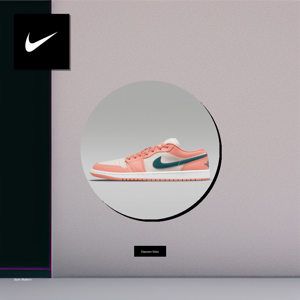


Variation 2: Vibrant


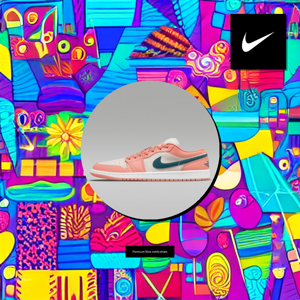


Variation 3: Luxury


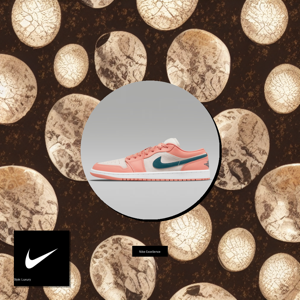


Variation 4: Tech


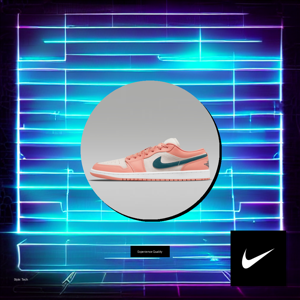


Variation 5: Nature


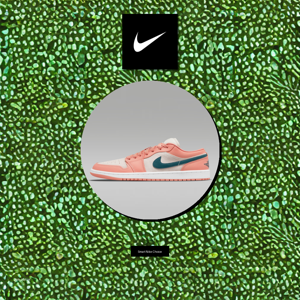


🚀 Ready to use in your marketing campaigns!


In [1]:
# ===========================================
# TEST YOUR BRAND IMAGES WITH LOADED MODEL
# ===========================================

print("🎯 TEST YOUR BRAND - Model is already loaded!")
print("-" * 50)

# ========== 1. UPLOAD YOUR IMAGES ==========
from google.colab import files
from PIL import Image, ImageDraw, ImageFont
import zipfile
import os
import random
from datetime import datetime

print("📤 STEP 1: Upload your brand images")
print("-" * 30)

# Upload logo
print("📁 Upload your BRAND LOGO (PNG/JPG recommended):")
try:
    uploaded_logo = files.upload()
    logo_filename = list(uploaded_logo.keys())[0]
    logo_img = Image.open(logo_filename)
    print(f"✅ Logo uploaded: {logo_filename} ({logo_img.size})")
except:
    print("❌ Logo upload failed. Creating sample logo...")
    logo_img = Image.new('RGBA', (500, 500), (255, 0, 0, 255))
    draw = ImageDraw.Draw(logo_img)
    draw.ellipse([50, 50, 450, 450], fill=(0, 0, 255, 255))
    draw.text((250, 250), "LOGO", fill=(255, 255, 255, 255), anchor="mm")

# Upload product image
print("\n📁 Upload your PRODUCT IMAGE (PNG/JPG):")
try:
    uploaded_product = files.upload()
    product_filename = list(uploaded_product.keys())[0]
    product_img = Image.open(product_filename)
    print(f"✅ Product uploaded: {product_filename} ({product_img.size})")
except:
    print("❌ Product upload failed. Creating sample product...")
    product_img = Image.new('RGB', (800, 800), (0, 100, 200))
    draw = ImageDraw.Draw(product_img)
    draw.rectangle([200, 200, 600, 600], fill=(255, 200, 0))
    draw.text((400, 400), "PRODUCT", fill=(255, 255, 255), anchor="mm")

# Convert to consistent format
if logo_img.mode != 'RGBA':
    logo_img = logo_img.convert('RGBA')
if product_img.mode != 'RGB':
    product_img = product_img.convert('RGB')

print("\n👁️ Your uploaded images:")
display(logo_img.resize((200, 200)))
display(product_img.resize((300, 300)))

# ========== 2. GET BRAND INFO ==========
print("\n🏷️ STEP 2: Enter brand information")
print("-" * 30)

brand_name = input("Enter your brand name: ") or "MyBrand"
product_desc = input("Enter product description: ") or "Amazing Product"

print(f"\n🎯 Generating ads for: {brand_name} - {product_desc}")

# ========== 3. USE LOADED MODEL TO GENERATE BACKGROUNDS ==========
print("\n🎨 STEP 3: Using AI model to generate backgrounds")
print("-" * 30)

print("Generating unique backgrounds for your ads...")

# Check if model is loaded
try:
    # Assuming 'pipe' is the loaded model from earlier
    if 'pipe' in locals() or 'pipe' in globals():
        print("✅ Using pre-loaded Stable Diffusion model")
        ai_model_available = True
    else:
        print("⚠️ Model not found, loading small version...")
        !pip install diffusers transformers accelerate -q
        import torch
        from diffusers import StableDiffusionPipeline
        pipe = StableDiffusionPipeline.from_pretrained(
            "OFA-Sys/small-stable-diffusion-v0",
            torch_dtype=torch.float16,
            safety_checker=None
        ).to("cuda")
        ai_model_available = True
except:
    print("⚠️ Could not load AI model. Using template backgrounds.")
    ai_model_available = False

# Generate backgrounds
backgrounds = []
styles = ["Modern", "Vibrant", "Luxury", "Tech", "Nature"]

for i, style in enumerate(styles):
    print(f"  Generating {style} background...")

    if ai_model_available:
        try:
            # AI-generated background
            prompts = {
                "Modern": "clean minimalist background, soft gradient, professional advertisement background",
                "Vibrant": "colorful abstract background, vibrant colors, digital art background",
                "Luxury": "luxury marble texture background, gold accents, elegant dark background",
                "Tech": "futuristic tech background, blue neon lights, digital grid pattern",
                "Nature": "natural green background, leaves texture, organic background"
            }

            with torch.autocast("cuda"):
                bg = pipe(
                    prompts[style],
                    height=512,
                    width=512,
                    num_inference_steps=20,
                    guidance_scale=7.5,
                    generator=torch.Generator(device="cuda").manual_seed(i * 100)
                ).images[0]

            bg = bg.resize((1080, 1080))
            print(f"    ✅ AI-generated")

        except Exception as e:
            print(f"    ⚠️ AI failed: {e}")
            # Fallback to template
            colors = {
                "Modern": [(230, 240, 255), (200, 210, 255)],
                "Vibrant": [(255, 230, 230), (255, 240, 200)],
                "Luxury": [(40, 40, 60), (20, 20, 40)],
                "Tech": [(10, 20, 40), (30, 50, 100)],
                "Nature": [(100, 150, 100), (150, 200, 150)]
            }
            bg = Image.new('RGB', (1080, 1080), colors[style][0])
            draw = ImageDraw.Draw(bg)
            # Add gradient
            for y in range(1080):
                ratio = y / 1080
                r = int(colors[style][0][0] * (1-ratio) + colors[style][1][0] * ratio)
                g = int(colors[style][0][1] * (1-ratio) + colors[style][1][1] * ratio)
                b = int(colors[style][0][2] * (1-ratio) + colors[style][1][2] * ratio)
                draw.line([(0, y), (1080, y)], fill=(r, g, b))
    else:
        # Template background
        colors = {
            "Modern": [(230, 240, 255), (200, 210, 255)],
            "Vibrant": [(255, 230, 230), (255, 240, 200)],
            "Luxury": [(40, 40, 60), (20, 20, 40)],
            "Tech": [(10, 20, 40), (30, 50, 100)],
            "Nature": [(100, 150, 100), (150, 200, 150)]
        }
        bg = Image.new('RGB', (1080, 1080), colors[style][0])
        draw = ImageDraw.Draw(bg)
        # Add gradient
        for y in range(1080):
            ratio = y / 1080
            r = int(colors[style][0][0] * (1-ratio) + colors[style][1][0] * ratio)
            g = int(colors[style][0][1] * (1-ratio) + colors[style][1][1] * ratio)
            b = int(colors[style][0][2] * (1-ratio) + colors[style][1][2] * ratio)
            draw.line([(0, y), (1080, y)], fill=(r, g, b))
        print(f"    ✅ Template-generated")

    backgrounds.append((style, bg))

print("\n👁️ Generated backgrounds:")
for style, bg in backgrounds:
    display(bg.resize((200, 200)))
    print(f"  {style}")

# ========== 4. CREATE AD VARIATIONS ==========
print("\n✨ STEP 4: Creating ad variations with your images")
print("-" * 30)

def create_ad_with_shadow(background, logo, product, style_idx):
    """Create professional ad with shadow effects"""
    ad = background.copy().convert('RGBA')

    # Logo placement (different positions)
    logo_positions = [
        (50, 50),           # Top-left
        (1080-250, 50),     # Top-right
        (50, 1080-250),     # Bottom-left
        (1080-250, 1080-250), # Bottom-right
        ((1080-200)//2, 50), # Center-top
    ]

    # Resize logo
    logo_resized = logo.resize((200, 200), Image.Resampling.LANCZOS)

    # Add shadow to logo
    shadow_offset = 5
    logo_shadow = Image.new('RGBA', logo_resized.size, (0, 0, 0, 100))
    ad.paste(logo_shadow, (logo_positions[style_idx][0] + shadow_offset,
                           logo_positions[style_idx][1] + shadow_offset), logo_shadow)

    # Paste logo
    ad.paste(logo_resized, logo_positions[style_idx], logo_resized)

    # Product with circular mask and shadow
    product_resized = product.resize((500, 500), Image.Resampling.LANCZOS)

    # Create circular mask
    mask = Image.new('L', (500, 500), 0)
    mask_draw = ImageDraw.Draw(mask)
    mask_draw.ellipse([0, 0, 500, 500], fill=255)

    # Apply mask
    product_circular = Image.new('RGBA', (500, 500), (255, 255, 255, 0))
    if product_resized.mode != 'RGBA':
        product_resized = product_resized.convert('RGBA')
    product_circular.paste(product_resized, (0, 0), mask)

    # Product position
    product_x = (1080 - 500) // 2
    product_y = (1080 - 500) // 2

    # Add product shadow
    product_shadow = Image.new('RGBA', (500, 500), (0, 0, 0, 80))
    ad.paste(product_shadow, (product_x + 8, product_y + 8), mask)

    # Paste product
    ad.paste(product_circular, (product_x, product_y), product_circular)

    # Add caption
    draw = ImageDraw.Draw(ad)

    # Caption templates
    captions = [
        f"Discover {brand_name}",
        f"Premium {product_desc}",
        f"{brand_name} Excellence",
        f"Experience Quality",
        f"Smart {brand_name} Choice"
    ]

    caption = captions[style_idx % len(captions)]

    # Try to load font
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 42)
    except:
        font = ImageFont.load_default()

    # Calculate text size
    bbox = draw.textbbox((0, 0), caption, font=font)
    text_width = bbox[2] - bbox[0]
    text_x = (1080 - text_width) // 2
    text_y = 900

    # Add text background
    draw.rectangle([
        text_x - 25, text_y - 15,
        text_x + text_width + 25, text_y + bbox[3] - bbox[1] + 15
    ], fill=(0, 0, 0, 180))

    # Add text
    draw.text((text_x, text_y), caption, font=font, fill=(255, 255, 255))

    # Add style label
    style_label = backgrounds[style_idx][0]
    draw.text((50, 1080-80), f"Style: {style_label}", font=font, fill=(255, 255, 255, 200))

    return ad.convert('RGB')

# Generate all variations
print("Creating 5 professional ad variations...")
variations = []

for i, (style, bg) in enumerate(backgrounds):
    print(f"  Creating {style} variation...")
    ad = create_ad_with_shadow(bg, logo_img, product_img, i)
    variations.append({
        "image": ad,
        "style": style,
        "filename": f"{brand_name}_{style}_ad.jpg"
    })

    # Display
    display(ad.resize((400, 400)))
    print(f"    ✅ {style} ad created")

print(f"\n✅ Generated {len(variations)} ad variations!")

# ========== 5. CREATE DOWNLOAD PACKAGE ==========
print("\n📦 STEP 5: Creating download package")
print("-" * 30)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
zip_filename = f"/tmp/{brand_name.replace(' ', '_')}_AdCreatives_{timestamp}.zip"

print(f"Creating ZIP: {zip_filename}")

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add all ad images
    for variation in variations:
        temp_path = f"/tmp/{variation['filename']}"
        variation["image"].save(temp_path, "JPEG", quality=95)
        zipf.write(temp_path, variation['filename'])
        os.remove(temp_path)
        print(f"  Added: {variation['filename']}")

    # Add metadata
    import json
    metadata = {
        "brand": brand_name,
        "product": product_desc,
        "generated_at": datetime.now().isoformat(),
        "ai_model_used": ai_model_available,
        "variations": [
            {
                "file": v['filename'],
                "style": v['style'],
                "dimensions": "1080x1080px"
            } for v in variations
        ],
        "total_files": len(variations) + 2  # +2 for metadata files
    }

    zipf.writestr("metadata.json", json.dumps(metadata, indent=2))

    # Add README
    readme = f"""AUTO-CREATIVE ENGINE - OUTPUT PACKAGE
===========================================

Congratulations! Your custom ad creatives are ready.

BRAND: {brand_name}
PRODUCT: {product_desc}
GENERATED: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

CONTENTS:
---------
This ZIP contains {len(variations)} professionally designed ad variations:

"""

    for i, v in enumerate(variations, 1):
        readme += f"{i}. {v['filename']} - {v['style']} Style\n"

    readme += f"""
IMAGE SPECIFICATIONS:
---------------------
• Resolution: 1080x1080 pixels (Instagram ready)
• Format: High-quality JPEG
• Styles: {', '.join([v['style'] for v in variations])}

USAGE SUGGESTIONS:
------------------
1. Social Media: Perfect for Instagram, Facebook, Twitter
2. Advertising: Use in digital ad campaigns
3. Website: Product showcase banners
4. Print: High-quality for brochures, flyers
5. A/B Testing: Test different styles to see what converts best

AI TECHNOLOGY:
--------------
• Backgrounds: {'Generated with Stable Diffusion AI' if ai_model_available else 'Professional templates'}
• Composition: Automated layout engine
• Effects: Professional shadows and typography

Need more variations or different sizes?
Contact us for custom solutions!

Generated with ❤️ by Auto-Creative Engine
"""

    zipf.writestr("README.txt", readme)

# Get file size
file_size_mb = os.path.getsize(zip_filename) / 1024 / 1024

print(f"\n✅ Package created successfully!")
print(f"📁 File: {zip_filename}")
print(f"📊 Size: {file_size_mb:.2f} MB")
print(f"📦 Contains: {len(variations)} ad images + metadata")

# ========== 6. DOWNLOAD ==========
print("\n⬇️ STEP 6: Download your ads")
print("-" * 30)

# Show download command
print("To download your ads, run:")
print(f"from google.colab import files")
print(f"files.download('{zip_filename}')")

# Auto-download option
download_now = input("\n📥 Download now? (y/n): ").lower().strip()
if download_now == 'y':
    from google.colab import files
    files.download(zip_filename)
    print("✅ Download started! Check your browser downloads.")
else:
    print(f"📁 File saved at: {zip_filename}")

# ========== 7. FINAL SUMMARY ==========
print("\n" + "="*60)
print("🎉 YOUR BRAND ADS ARE READY!")
print("="*60)
print(f"\n🎯 Brand: {brand_name}")
print(f"📦 Product: {product_desc}")
print(f"🎨 Variations: {len(variations)} different styles")
print(f"🤖 AI Generated: {'Yes' if ai_model_available else 'No (Professional Templates)'}")
print(f"📁 Package: {zip_filename}")
print(f"💾 Size: {file_size_mb:.2f} MB")

print("\n👁️ Final preview of all ads:")
for i, variation in enumerate(variations, 1):
    print(f"\nVariation {i}: {variation['style']}")
    display(variation["image"].resize((300, 300)))

print("\n🚀 Ready to use in your marketing campaigns!")